In [1]:
#derived from songify.ipynb
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from scipy.spatial import distance
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data_full = pd.read_csv("data.csv")
data = pd.read_csv("data_red.csv")
data_full.head()

C:\Users\ankur\AppData\Local\Temp\ipykernel_12668\1971686266.py:1: DtypeWarning: Columns (0,1,2,4,5,6,7,9,10,11,12,13,15,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data_full = pd.read_csv("data.csv")


,,,,,,,,,,,,,,,,,,<<<<<<< HEAD
valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berliner Philharmoniker']",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. Finale. Alla breve",4,1921,0.0366,80.954
0.963,1921,0.732,['Dennis Day'],0.8190000000000001,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.0,7,0.16,-12.441,1,Clancy Lowered the Boom,5,1921,0.415,60.93600000000001
0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadiningrat'],0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913,3,0.101,-14.85,1,Gati Bali,5,1921,0.0339,110.339
0.165,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,2.77e-05,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109


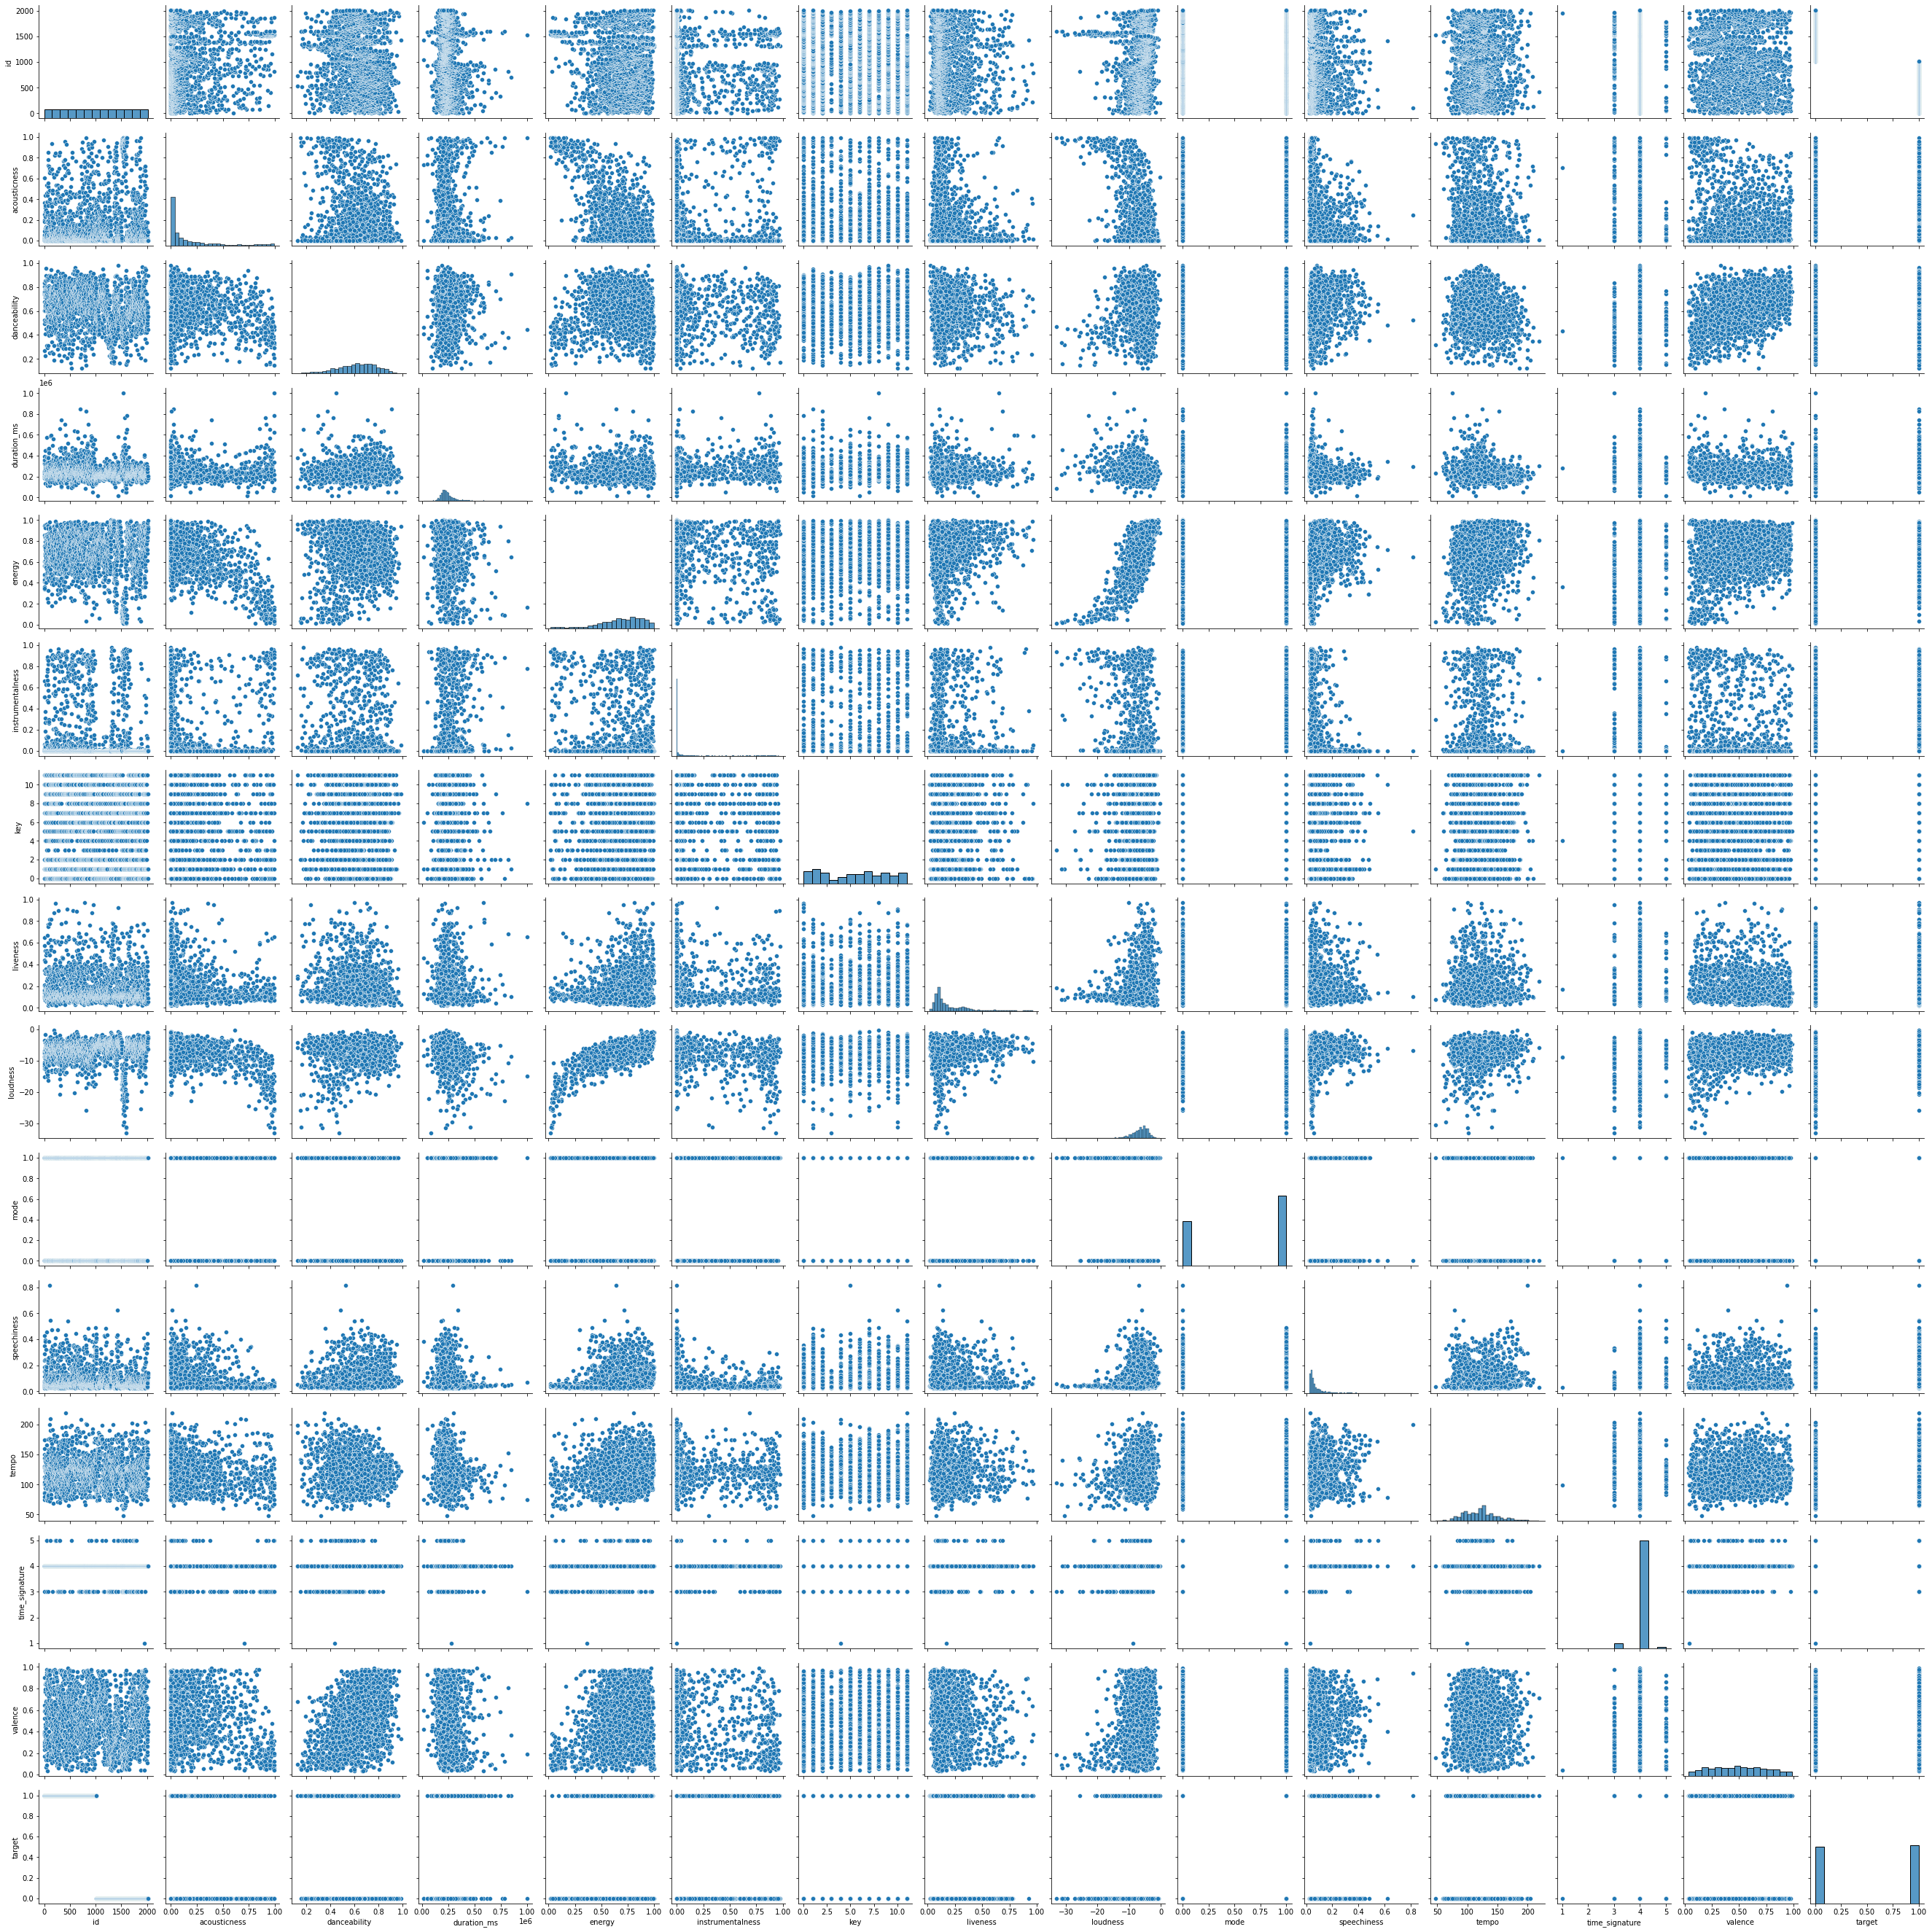

In [5]:
sns.pairplot(data)

In [6]:
# observations :
#     more danceability songs have more energy
#     more songs with less durations have : more loudness in general and less speechiness in general
#     more songs with high liveness have less speechiness
#     mode has no relation with other features, it is spread across uniformly
#     time_sign and target has no specific relationship with other features

In [7]:
data.corr()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
id,1.000000,0.133055,-0.139615,-0.104185,-0.039880,-0.104641,-0.035611,-0.039962,0.021935,0.060639,-0.135362,-0.027890,-0.053235,-0.077812,-0.865969
acousticness,0.133055,1.000000,-0.179894,0.071536,-0.646319,0.144397,-0.081037,-0.117126,-0.562021,0.068028,-0.099893,-0.127596,-0.190353,-0.152227,-0.129627
danceability,-0.139615,-0.179894,1.000000,0.004695,0.038557,-0.130561,0.022325,-0.132044,0.104362,-0.047867,0.142661,-0.143538,0.128909,0.442061,0.176706
duration_ms,-0.104185,0.071536,0.004695,1.000000,-0.144473,0.305403,0.023570,0.023203,-0.273798,-0.074806,-0.079562,-0.076469,-0.040157,-0.120030,0.146749
energy,-0.039880,-0.646319,0.038557,-0.144473,1.000000,-0.122890,0.072886,0.217435,0.762177,-0.070263,0.093102,0.165721,0.182895,0.278383,0.039688
instrumentalness,-0.104641,0.144397,-0.130561,0.305403,-0.122890,1.000000,-0.009640,0.001063,-0.354625,-0.030099,-0.155349,0.000347,-0.070721,-0.194630,0.152594
key,-0.035611,-0.081037,0.022325,0.023570,0.072886,-0.009640,1.000000,0.049739,0.050929,-0.195040,0.019116,0.040301,0.024937,0.032485,0.033594
liveness,-0.039962,-0.117126,-0.132044,0.023203,0.217435,0.001063,0.049739,1.000000,0.156648,-0.018587,0.092403,0.010558,0.018199,-0.053011,0.026364
loudness,0.021935,-0.562021,0.104362,-0.273798,0.762177,-0.354625,0.050929,0.156648,1.000000,-0.044015,0.088844,0.156418,0.143011,0.204968,-0.072000
mode,0.060639,0.068028,-0.047867,-0.074806,-0.070263,-0.030099,-0.195040,-0.018587,-0.044015,1.000000,-0.049398,-0.059995,-0.039038,-0.032879,-0.072336


In [8]:
df_corr = pd.read_csv("data.csv")

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df_corr.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.show()

C:\Users\ankur\AppData\Local\Temp\ipykernel_12668\3152833011.py:1: DtypeWarning: Columns (0,1,2,4,5,6,7,9,10,11,12,13,15,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_corr = pd.read_csv("data.csv")


NameError: name 'df' is not defined

<Figure size 960x800 with 0 Axes>

In [ ]:
#     observations :
#     acousticness -ve correlation with energy and loudness
#     energy positive correlation with loudness
#     danceability positive correlation with valence

In [ ]:
data = data.drop(["target","key","mode","time_signature"],1)
df = data.copy()
df.head()

In [ ]:
col = ['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']

In [ ]:
scaler = StandardScaler()
df[col]=scaler.fit_transform(df[col])

In [ ]:
def find(id):
    b=0
    a=0
    song = []
    index =0
    for i in data["id"]:
        if id == i:
            b+=1
            song = np.array(data)[i]
            index = i
            #print("id : ",i,"acous ",data["acousticness"][i])
            break;
        a+=1
    if(b==0):
        print("nothing found.")
        return 0  
    return song, index

In [ ]:
id = 2015
find(id) 

In [ ]:
def similar_tracks(id):
    if (find(id) == 0):
        return 0
    else:
        x=find(id)[0]
        index = find(id)[1]
    no_of_rec = 10
    p = []
    count=0
    for i in data.values:
        p.append([distance.cosine(x,i),count])
        count+=1
    p.sort()
    song_ids = data["id"]
    print("\nSimilar songs to ",index,"-",data_full.loc[index].at["song_title"],"by ",data_full.loc[index].at["artist"],"\n")
    print ("\n{:<8} {:<10} {:<40} {:<10}\n".format('s.no','song_id','song_name','artist'))
    for i in range(1,no_of_rec):
        print ("{:<8} {:<10} {:<40} {:<10}".format('i',song_ids[p[i][1]],data_full.loc[song_ids[p[i][1]]].at["song_title"],data_full.loc[song_ids[p[i][1]]].at["artist"]))

In [ ]:
id = 2015
similar_tracks(id)